In [1]:
import re
import json
import numpy as np
import pandas as pd
from functools import partial

import sklearn
from sklearn.preprocessing import StandardScaler
import joblib

import lightgbm as lgb
from lightgbm import LGBMClassifier

## Own specific functions 
from functions import *

scaler = StandardScaler()

<div style="background-color: #506AB9;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">Files</h1>
</div>

In [2]:
df_customer = pd.read_csv(r"datasets\df_customers_to_predict.csv")

# Formatting columns name
df_customer = df_customer.rename(columns=lambda x:re.sub("[^A-Za-z0-9_]+", "", x))

In [3]:
df_analysis(df_customer, "df_customer", analysis_type="header")


Analysis Header of df_customer dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 796 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 296.0 MB


<div class="alert alert-block alert-info">
    <p>Models</p>
</div>

In [4]:
# load the model from disk
initial_model = joblib.load("models\model_1.0.2.pkl")

In [5]:
# load the model from disk
not_resampled_not_scaler_model = joblib.load("models\model_clf_not_resampled_not_scaler.pkl")

In [6]:
# load the model from disk
not_resampled_scaler_model = joblib.load("models\model_clf_not_resampled_scaler.pkl")

In [7]:
# load the model from disk
resampled_not_scaler_model = joblib.load("models\model_clf_resampled_not_scaler.pkl")

<div style="background-color: #506AB9;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">Filterin by customer(s)</h1>
</div>

In [8]:
#pay = [100001, 456168, 456223, 100066, 100028, 456008]
#no_pay = [100172, 105749, 452356, 452768, 452768]

In [9]:
#df_temp = df_customer[df_customer["SK_ID_CURR"] == 100001]
df_temp = df_customer.drop(columns=["SK_ID_CURR"])

In [10]:
X_scaled = scaler.fit_transform(df_temp)

<div class="alert alert-block alert-info">
    <p>Initial model</p>
</div>

In [11]:
result_initial_model = initial_model.predict(X_scaled)
print('Total occurences of "0" in array: ', result_initial_model.tolist().count(0))

Total occurences of "0" in array:  1


In [12]:
df_result_initial_model = df_customer.copy()
result_initial_model  = pd.Series(result_initial_model, name="TARGET")
df_result_initial_model.insert(1, "TARGET", result_initial_model)
df_result_initial_model.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,1.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
1,100005,1.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2,100013,1.0,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,96.000000
3,100028,1.0,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49.000000
4,100038,1.0,0,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


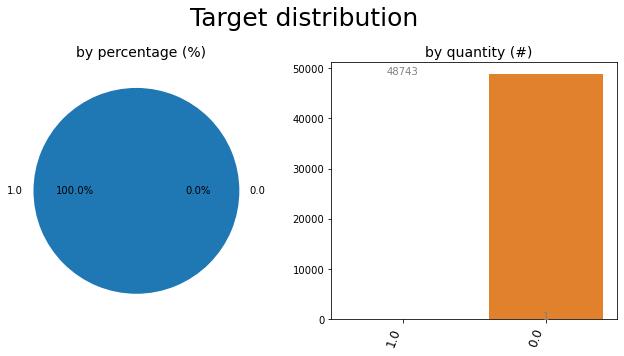

In [13]:
barplot_and_pie(df_result_initial_model["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-info">
    <p>Not Resampled and not scaler</p>
</div>

In [14]:
result_not_resampled_not_scaler_model = not_resampled_not_scaler_model.predict(df_temp)
print('Total occurences of "0" in array: ', result_not_resampled_not_scaler_model.tolist().count(0))

Total occurences of "0" in array:  48577


In [15]:
df_result_not_resampled_not_scaler_model = df_customer.copy()
result_not_resampled_not_scaler_model  = pd.Series(result_not_resampled_not_scaler_model, name="TARGET")
df_result_not_resampled_not_scaler_model.insert(1, "TARGET", result_not_resampled_not_scaler_model)
df_result_not_resampled_not_scaler_model.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
1,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2,100013,0.0,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,96.000000
3,100028,0.0,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49.000000
4,100038,0.0,0,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


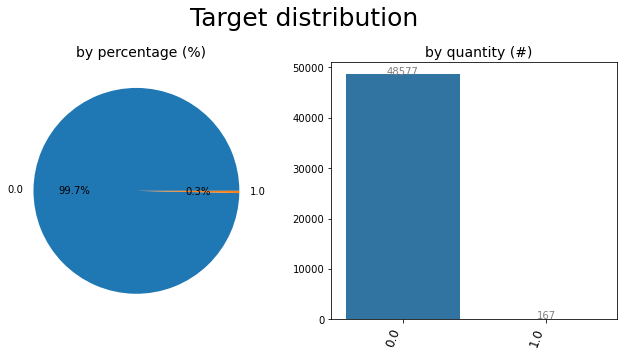

In [16]:
barplot_and_pie(df_result_not_resampled_not_scaler_model["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-info">
    <p>Not Resampled and scaler</p>
</div>

In [17]:
result_not_resampled_scaler_model = not_resampled_scaler_model.predict(X_scaled)
print('Total occurences of "0" in array: ', result_not_resampled_scaler_model.tolist().count(0))

Total occurences of "0" in array:  48588


In [18]:
df_result_not_resampled_scaler_model = df_customer.copy()
result_not_resampled_scaler_model  = pd.Series(result_not_resampled_scaler_model, name="TARGET")
df_result_not_resampled_scaler_model.insert(1, "TARGET", result_not_resampled_scaler_model)
df_result_not_resampled_scaler_model.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
1,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2,100013,0.0,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,96.000000
3,100028,0.0,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49.000000
4,100038,0.0,0,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


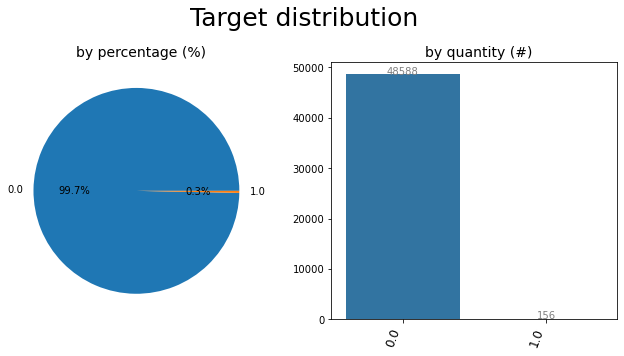

In [19]:
barplot_and_pie(df_result_not_resampled_scaler_model["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-info">
    <p>Resampled and not scaler</p>
</div>

In [20]:
result_resampled_not_scaler_model = resampled_not_scaler_model.predict(df_temp)
print('Total occurences of "0" in array: ', result_resampled_not_scaler_model.tolist().count(0))

Total occurences of "0" in array:  48574


In [21]:
df_result_resampled_not_scaler_model = df_customer.copy()
result_resampled_not_scaler_model  = pd.Series(result_resampled_not_scaler_model, name="TARGET")
df_result_resampled_not_scaler_model.insert(1, "TARGET", result_resampled_not_scaler_model)
df_result_resampled_not_scaler_model.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
1,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2,100013,0.0,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,96.000000
3,100028,0.0,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49.000000
4,100038,0.0,0,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


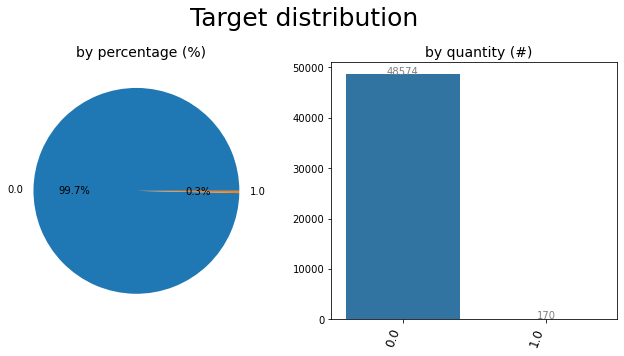

In [22]:
barplot_and_pie(df_result_resampled_not_scaler_model["TARGET"], "Target distribution", " ")

In [27]:
df_result_resampled_not_scaler_model[df_result_resampled_not_scaler_model["TARGET"] == 1].head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
998,106854,1.0,1,0,0,0,202500.0,574402.5,29457.0,495859.5,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,33.000000
1610,111452,1.0,0,1,0,0,333000.0,748651.5,59278.5,639000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,17.000000
1935,113627,1.0,0,0,0,0,135000.0,440784.0,34956.0,360000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2035,114283,1.0,0,0,1,0,90000.0,156384.0,14341.5,135000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2037,114310,1.0,0,0,0,0,225000.0,1327500.0,54913.5,1327500.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


In [24]:
df_result_resampled_not_scaler_model[df_result_resampled_not_scaler_model["TARGET"] == 0].tail()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
48739,456221,0.0,1,0,0,0,121500.0,412560.0,17473.5,270000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
48740,456222,0.0,1,0,1,2,157500.0,622413.0,31909.5,495000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
48741,456223,0.0,1,1,0,1,202500.0,315000.0,33205.5,315000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
48742,456224,0.0,0,0,1,0,225000.0,450000.0,25128.0,450000.0,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
48743,456250,0.0,1,1,1,0,135000.0,312768.0,24709.5,270000.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,12.000000
